# Visualizing Earnings Based On College Majors
In this project, the pandas plotting functionality along with the Jupyter notebook interface is utilized to explore data quickly using visualizations. The dataset used here is about the job outcomes of students who graduated from college in the USA between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading in the dataset and examining the columns and datatypes
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [3]:
# Peeking views at the top and bottom of the data
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
# Looking at preliminary statistical data of each column
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


## Data cleaning

In [7]:
# Dropping any rows that contain even a single missing value in any of the columns
recent_grads = recent_grads.dropna(axis=0)

In [8]:
# Checking how many rows were dropped 
clean_data_count = recent_grads.shape[0]
print(clean_data_count - raw_data_count)

-1


## Exploratory data visualization
This step consists of exploring the dataset primarily by plotting different variables against each other, each of which pose an answer to the question "Is quantity X related to quantity Y?"

### Scatter Plots
####  i. Looking at popular majors in terms of income and employment percentage  

(0, 4422.507346698851)

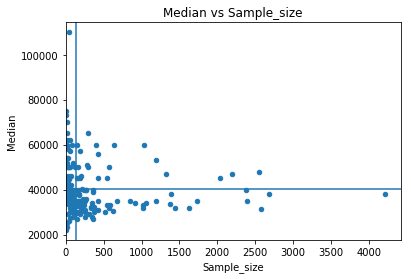

In [9]:
# Plotting a graph between sample size of each college major graduate population and the median income after graduation     
ax1 = recent_grads.plot('Sample_size', 'Median', 'scatter')
ax1.set_title('Median vs Sample_size')
ax1.axhline(y=recent_grads['Median'].mean())
ax1.axvline(x=recent_grads['Sample_size'].median())
ax1.set_xlim(0)

The plot above aids in answering the question "Do students in more popular majors make more money?", as popularity is defined by how many students join college and pursue graduation in a particular field, which in turn influences the sample size in each major. The median of the incomes is chosen here because the mean may over-estimate what a general graduate earns, due to presence of outliers. 
From the plot above, it can be seen that for greater sample sizes say, above 100 (100 is the median sample size value), most median salaries of popular majors hover around the median salary average (the blue horizontal line denotes the mean). So, the answer to that question posed above is no, infact, these popular major graduates make slightly less than average of the median salaries of all occupations. 
This can further be verified by a small summary calculation.

In [10]:
recent_grads[recent_grads['Sample_size'] > 100]['Median'].mean()

38012.37113402062

This is close to, but less than the mean median salary value of nearly $40,000.

(0, 4422.507346698851)

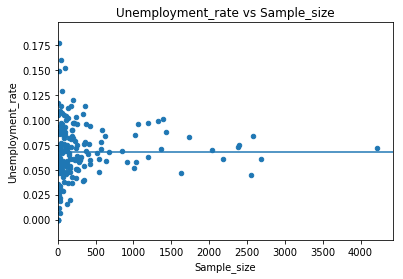

In [11]:
# Plotting a graph between sample size of each college major graduate population and unemployment rate after graduation 
ax2 = recent_grads.plot('Sample_size', 'Unemployment_rate', 'scatter')
ax2.set_title('Unemployment_rate vs Sample_size')
ax2.axhline(y=recent_grads['Unemployment_rate'].mean())
ax2.set_xlim(0,)

This helps in answering the question "Are unemployment rates lower in those professions which are more popular college majors?". As can be observed from the graph above, the answer to that is no. These popular fields have about the same unemployment rates as the average of all the unemployments rates across all professions. 

(0, 264111.45734669885)

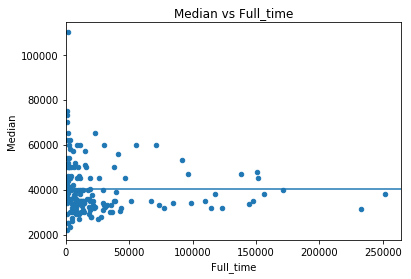

In [12]:
# Plotting between median salary from every profession vs number of full time employed graduates
ax3 = recent_grads.plot('Full_time', 'Median', 'scatter')
ax3.set_title('Median vs Full_time')
ax3.axhline(y=recent_grads['Median'].mean())
ax3.set_xlim(0,)

From this graph, it can be noted that the occupations having large amount of full time employment opportunities promise pay that is the average of median salaries. This plot helps to answer the question "Does picking majors having the maximum number of full time opportunities help in bagging a job with a larger than average income?", to which the answer is no, it does not. In fact, taking this low risk approach guarantees that the income will also not be drastically far from the mean.

An observation from the three graphs above can be made that if a student were to choose a major based on maximising future expected earnings and job security, choosing the popular majors in terms of sheer popularity (Sample_size) or steady employment (Unemployment_rate, Full_time) would not be advised.

#### ii. Comparing fields with respect to relative number of female graduates

(0, 1)

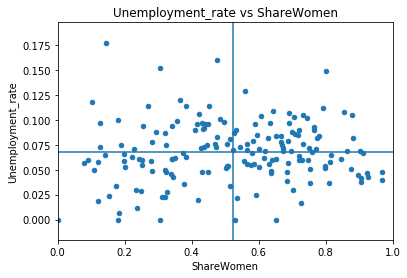

In [13]:
# Plotting unemployment rate vs share of women in each college major 
ax4 = recent_grads.plot('ShareWomen', 'Unemployment_rate', 'scatter')
ax4.set_title('Unemployment_rate vs ShareWomen')
ax4.axhline(y=recent_grads['Unemployment_rate'].mean())
ax4.axvline(x=recent_grads['ShareWomen'].mean())
ax4.set_xlim(0,1)

This plot helps to answer the question "Do students that majored in subjects that had relatively high females have higher rates of employment??". The answer is no, because as ShareWomen increases, there are rougly equal points above and below the average unemployment rate. In fact, the share of people who are women that complete college in a specific major does not correlate at all with unemployment rate in that corresponding profession. 

(0, 1)

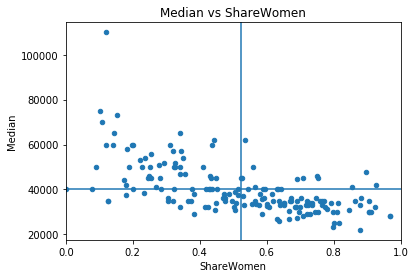

In [14]:
# Plotting a scatter between median income vs number of men in each profession
ax5 = recent_grads.plot('ShareWomen','Median','scatter')
ax5.set_title('Median vs ShareWomen')
ax5.axhline(recent_grads['Median'].mean())
ax5.axvline(recent_grads['ShareWomen'].mean())
ax5.set_xlim(0,1)

As the relative number of women in a field increases, the median income decreases. This indicates that there are some professions which are high paying but for a multitude of reasons (such as grouping effects, social conditioning, gender discrimination), do not have many women employed.  

### Histograms

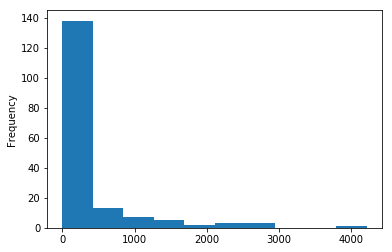

In [15]:
recent_grads['Sample_size'].plot.hist()

The histogram of Sample_size indicates it is a unimodal and positively skewed distribution.

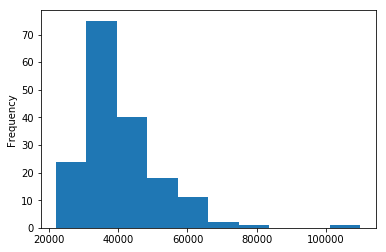

In [16]:
recent_grads['Median'].plot.hist()

Also a distribution that is unimodal and has almost zero skew. The most common median salary range is 30,000 - 40,000.

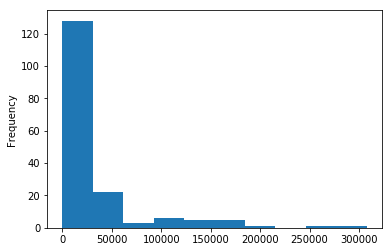

In [17]:
recent_grads['Employed'].plot.hist()

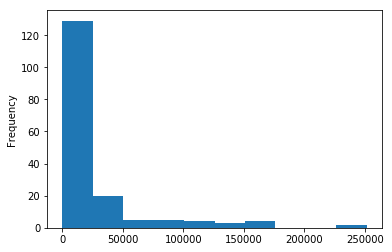

In [18]:
recent_grads['Full_time'].plot.hist()

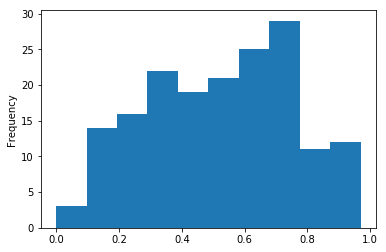

In [19]:
recent_grads['ShareWomen'].plot.hist()

Ideally, this histogram should be a distribution with an x axis range of 0.4 to 0.6 (hovering around 0.5 in almost all fields).

In [20]:
recent_grads[recent_grads['ShareWomen'] < 0.5].shape[0] / recent_grads.shape[0]

0.4418604651162791

Around 44 % of all majors are male dominated.

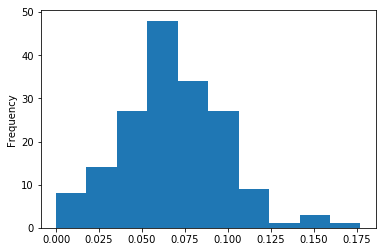

In [21]:
recent_grads['Unemployment_rate'].plot.hist()

The unemployment rate distribution looks to be normal with a mode at 5.5 %.

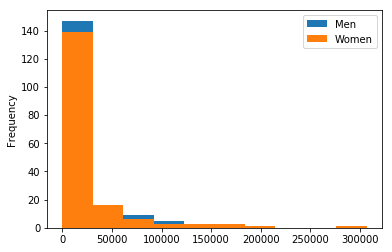

In [22]:
recent_grads[['Men','Women']].plot.hist()

The distributions of how many people are employed in each field whether they be male or female, are mostly similar. This indicates that there isn't any general form of gender discrimination or representation across many professional sectors. 

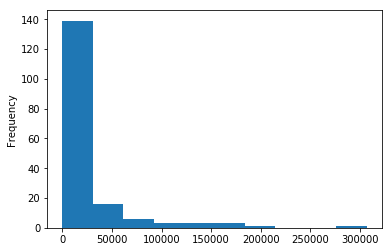

In [23]:
recent_grads['Women'].plot.hist()

### Scatter matrix, bar and other plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000161F6FE30B8>,
      dtype=object)

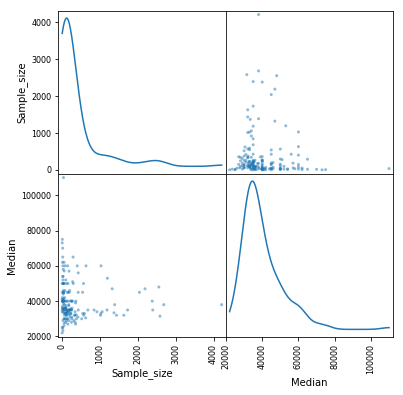

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(6, 6), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000161F6E85668>,
      dtype=object)

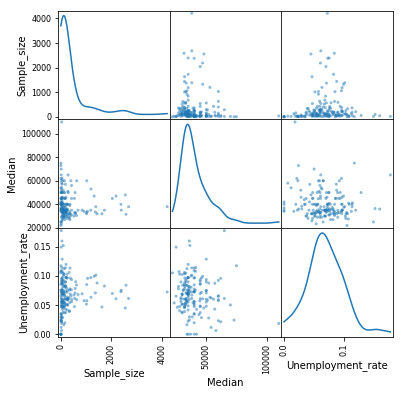

In [25]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(6, 6), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000161F7D95908>,
      dtype=object)

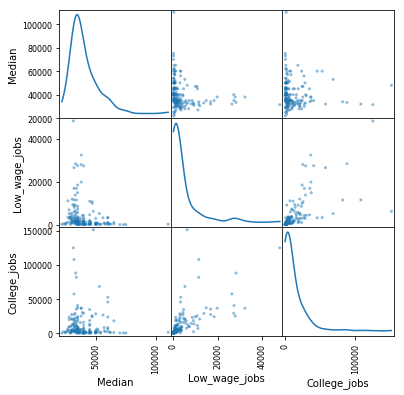

In [26]:
scatter_matrix(recent_grads[['Median','Low_wage_jobs','College_jobs']], figsize=(6, 6), diagonal='kde')

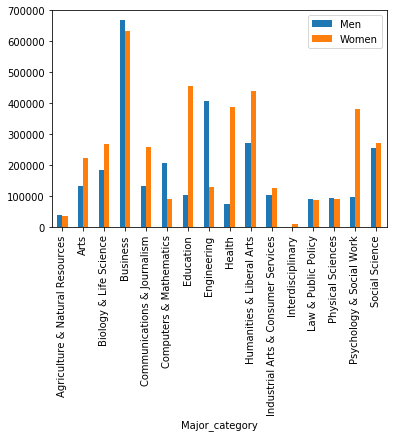

In [45]:
recent_grads.groupby('Major_category')[['Men','Women']].apply(sum).plot.bar()

Above is a grouped bar plot that compares the number of men to the number of women in every major category. Women outnumber men greatly in categories such as Communications and Journalism, Education, Health, Humanities and Liberal Arts, and Psychology and Social Work. Whereas men outnumber women greatly in categories such as Engineering, Computers and Mathematics. 